In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
n_sample = int(1e4)
sf = 1.5
masses = np.random.uniform(size=n_sample) * sf
x = np.random.normal(loc=(masses + 1) ** 2, scale=1 + masses)
x = np.random.poisson(size=n_sample) + masses
x = np.random.poisson(lam=masses) + masses

In [67]:
# print(help(np.random.poisson))

(array([3525., 2183., 1803., 1135.,  795.,  392.,   63.,   55.,   38.,
          11.]),
 array([4.58888766e-06, 7.49652224e-01, 1.49929986e+00, 2.24894749e+00,
        2.99859513e+00, 3.74824276e+00, 4.49789040e+00, 5.24753803e+00,
        5.99718567e+00, 6.74683331e+00, 7.49648094e+00]),
 <BarContainer object of 10 artists>)

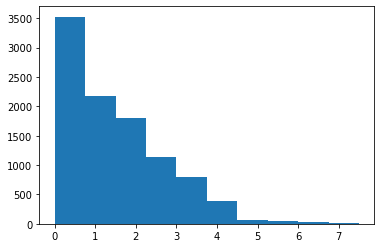

In [68]:
plt.hist(x)

In [69]:
masses /= sf
masses = masses * 1300 + 2900

In [70]:
sidebands = {
    'SB1': [3200, 3400],
    'SR': [3400, 3600],
    'SB2': [3600, 3800]
}

def mx_data(mass, x, sideband):
    sb = sidebands[sideband]
    mx = (mass >= sb[0]) & (mass <= sb[1])
    return mass[mx], x[mx]

In [71]:
# for band in sidebands:
#     plt.hist2d(*mx_data(masses, x, band), bins = 100)
#     plt.ylim([-1.5, 9])
#     plt.xlabel('Mass')
#     plt.ylabel('x')
#     plt.savefig(f'images/{band}.png')
#     plt.show()

In [72]:
def mx_data(mass, x, sideband):
    sb = sidebands[sideband]
    mx = (mass >= sb[0] - 300) & (mass <= sb[1] + 300)
    return mass[mx], x[mx]

<ipython-input-73-d97f9b5c1e0a>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-73-d97f9b5c1e0a>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-73-d97f9b5c1e0a>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


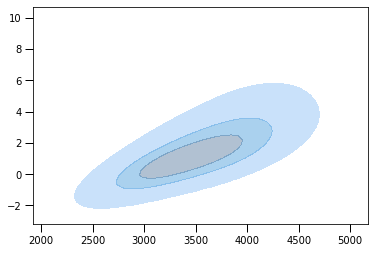

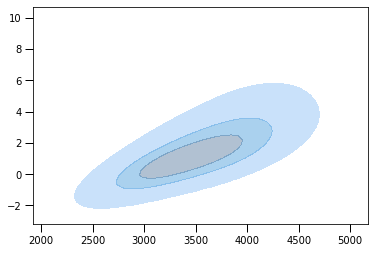

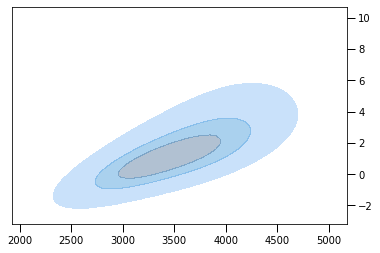

In [73]:
# for band in sidebands:
#     fig, ax = plt.subplots()
#     m, t = mx_data(masses, x, band)
# #     sns.kdeplot(m, y=t, levels = 4, alpha=0.4, fill=True, gridsize=50, bw_adjust=4)
#     sns.kdeplot(masses, y=x, levels = 4, alpha=0.4, fill=True, gridsize=50, bw_adjust=4)
#     ax.set_ylim([-2.5, 10])
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
#     ax.set_yticks([-2.5, 3.75, 10])
# #     ax.set_xticklabels([3200, 3300, 3400, 3500, 3600, 3700, 3800])
#     ax.set_xlim(sidebands[band])
#     ax.set_xticks(sidebands[band] + [int(np.mean(sidebands[band]))])
#     ax.tick_params('both', length=8, width=1, which='major')
#     if band == 'SB2':
#         ax.yaxis.tick_right()
#     plt.savefig(f'images/{band}.png')
#     fig.show()

for band in sidebands:
    fig, ax = plt.subplots()
    m, t = mx_data(masses, x, band)
#     sns.kdeplot(m, y=t, levels = 4, alpha=0.4, fill=True, gridsize=50, bw_adjust=4)
    sns.kdeplot(masses, y=x, levels = 4, alpha=0.4, fill=True, gridsize=50, bw_adjust=4)
    ax.tick_params('both', length=8, width=1, which='major')
    if band == 'SB2':
        ax.yaxis.tick_right()
    plt.savefig(f'images/{band}.png')
    fig.show()